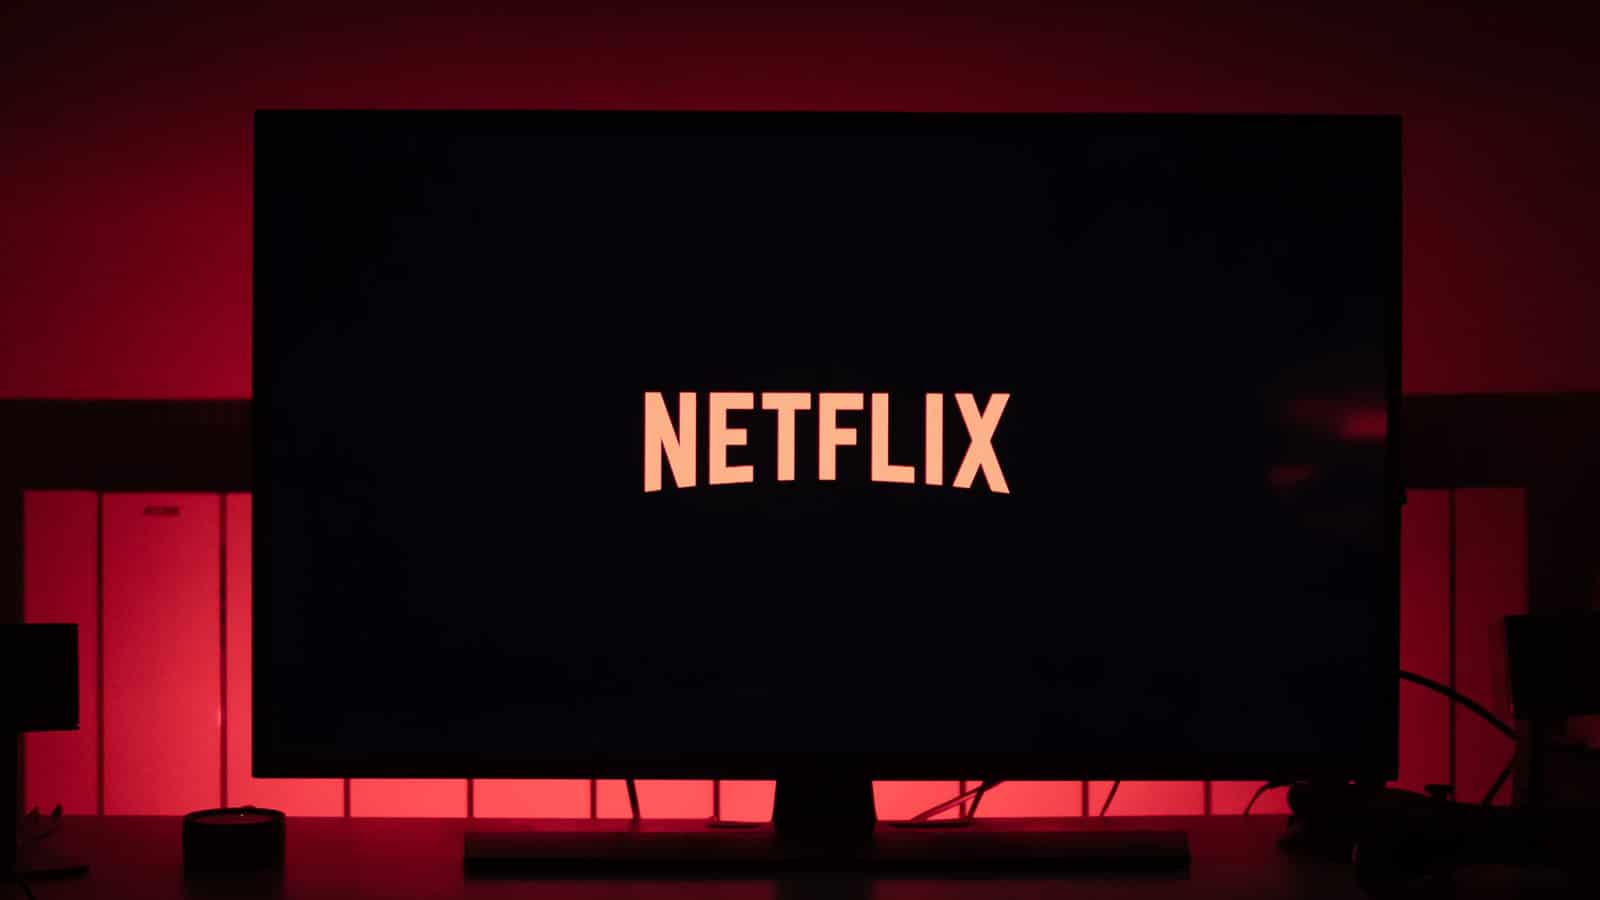

Netflix has gained immense popularity among the youth in India in the past couple of years. Founded in 1997, this OTT platform has over 200 million paying members with around 64% subscribers from outside the USA.

**Having known a few things aout the history of Netflix, let us dive deep into analysing the type and variety of content available on it.**


**If you enjoy the analysis and are able to find something suitable for you to watch tonight, do take out a few seconds to upvote!**

**Thanks in advance :)**

### Obtaining data & importing libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
netflix=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
netflix.head(5)

In [ ]:
netflix.shape

In [ ]:
netflix.columns

In [ ]:
netflix.describe()

In [ ]:
netflix.isnull().sum()

### Data Cleaning and Exploratory data analysis

#### Analysis of rating

In [ ]:
netflix.groupby('rating').type.value_counts()  #Typewise rating distribution of netflix content

In [ ]:
plt.figure(figsize=(13,8)) #Pltting the values obtained above
sns.countplot(netflix['rating'][:],hue=netflix['type'],color='Pink')

From the groupby classification above it can be seen that TV-MA is the rating obtained for maximum number of programs. So, we fill the missing values with the same.

From the graph and values obtained it can be seen that:
 TV-MA rated movies and TV Shows are highest in number. These are programs suitable for people above the age of 18.
 Next come movies and TV Shows rated TV 14 which suitable for viewers aged 14 and above.
 The third most common rating is TV-PG which come with suggestions of parental guidelines.

In [ ]:
#Flling in the missing values of the column ratings with the most common value that is TV-MA.
netflix['rating'].fillna('TV-MA',inplace=True)

In [ ]:
netflix['date_added'].fillna('1st December 2011',inplace=True) #Remove this and add on the basis of dates analysis

#### Analysis of type of content

In [ ]:
l=[] #Number of TV Shows
m=[] #Number of movies
for i in netflix['type']:
    if i=='TV Show':
        l.append(i)
    else:
        m.append(i)
print(len(l),len(m))

#Representation on plot
sns.set_style('whitegrid')
sns.countplot(netflix['type'],palette='summer')
plt.title('Content type')

The number of TV shows on the OTT platform is 2410 and movies is 5377 (More movies than TV shows)

#### Country wise analysis of availability of content

In [ ]:
print('Top 10 movie creators:')
print(netflix.groupby('type').country.value_counts()['Movie'][:10])   #Top 10 movies creating countries(what is available on Netflix)
print('\n')
print('Top 10 TV Show creators:')
print(netflix.groupby('type').country.value_counts()['TV Show'][:10])  #Top 10 TV Shows creating countries

#Visualisation (Top 10 content creating countries())
netflix['country'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 content creators')
plt.show()

Top 5 countries when it comes to availability and creation of movies:- USA, India, UK, Cananda, Egypt

Top 5 countries when it comes to availability and creation of TV Shows:- USA, UK, Japan, South Korea, India

In [ ]:
#Since most of the content is created in USA, so we fill the missing values of the country column with'USA'.
netflix['country'].fillna('United States',inplace=True)

#### Genre wise analysis of content

In [ ]:
print(netflix['listed_in'].value_counts()[:10])  #Top 10 genres of all types of content (TV Shows & Movies) and the visual representation.

plt.figure(figsize=(16,8))  
sns.countplot(y=netflix['listed_in'],order=netflix['listed_in'].value_counts().index[:10])

In [ ]:
#Wordcloud - The word appearing larger in a wordcloud has higher frequency.

from wordcloud import WordCloud, STOPWORDS
wc=''
stopwords=set(STOPWORDS)
for j in netflix['listed_in']:
    tokens=j.split(',')

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    wc =wc+ " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords).generate(wc)
plt.figure(figsize=(20,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Release date/year analysis (Type of content available, old to new)

In [ ]:
#Defining a function that categorises content on the basis of release_year

def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
netflix['Movie_release_type']=netflix['release_year'].apply(release)

In [ ]:
netflix.head()   #The new column called 'Movie_release_type' gets added 

In [ ]:
print(netflix.groupby('Movie_release_type').type.value_counts())
sns.countplot(netflix['Movie_release_type'],hue=netflix['type'],palette='autumn')

Most of the content available on Netflix has been released in the period 2000-2021.

Not many movies by the Gen Z population are available on the OTT platform. If we see the graph from close, it can be seen that the concept of TV Shows was not prominent before 2000. It started gaining some popularity in the first decade of 21st century.

In [ ]:
plt.figure(figsize=(12,6))  #Counting the total number of movie & TV Shows based on release year.
sns.set_style('darkgrid')
sns.countplot(x='release_year',data=netflix,order=netflix['release_year'].value_counts(ascending=False).index[:20])

Uploading of movies and TV Shows released every year has been increasing over the years.

#### 10 most old movies on Netflix:

In [ ]:
a=[]
b=[]
df=netflix['release_year'].sort_values(ascending=True)[:10].to_frame()
for i in df.index:
    a.append(netflix['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    b.append(netflix['title'].iloc[i])
df2=pd.DataFrame(data={'Release year':a,'Title':b},index=[1,2,3,4,5,6,7,8,9,10])   #Creating a dataframe from the values obtained.
df2

#### 10 most new movies on Netflix

In [ ]:
l=[]
m=[]
df=netflix['release_year'].sort_values(ascending=False)[:10].to_frame()
for i in df.index:
    l.append(netflix['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    m.append(netflix['title'].iloc[i])
df3=pd.DataFrame(data={'Release year':l,'Title':m},index=[1,2,3,4,5,6,7,8,9,10])
df3

#### Duration Analysis of Movies & TV Shows

In [ ]:
netflix.groupby('type').duration.value_counts()

In [ ]:
l=[]
m=[]
for i in netflix['duration']:
    if i[3:6]=='min':
        l.append(int(i[0:2]))
    elif i[4:7]=='min':
        l.append(int(i[0:3]))
    elif i[3:10]=='Seasons':
        m.append(int(i[0:2]))
        
#Visualisation (duration of movies in minutes)     
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(l)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix (in min)')

#Visualisation (number of seasons)
plt.figure(figsize=(12,6))
sns.countplot(m)
plt.xlabel('No. of seasons')
plt.ylabel('% of netflix TV Shows')
plt.title('Duration distribution of TV Shows on netflix (no. of seasons)')

Duration of most of the movies is less than 100 minutes (somewhere between 90-92 minutes) whereas most of the TV Shows have 10 seasons.

#### Directors

In [ ]:
netflix.groupby('type').director.value_counts()['Movie'][:10].plot(kind='bar',color='Red')
plt.title('Top 10 movie directors (highest no. of movies on Netflix)')

#This plot is not based on rating of movies but on the number of movies of the respective directors available on netflix.

Movie directors with most number of MOVIES on Netflix: Raul Campos, Jan Suter

In [ ]:
netflix.groupby('type').director.value_counts()['TV Show'][:10].plot(kind='bar',color='c')
plt.title('Top 10 TV Shows directors (highest no. of shows on Netflix)') 

#This plot is not based on rating of movies but on the number of movies of the respective directors available on netflix.

TV Shows director with most number of TV SHOWS on Netflix: Alastair Fothergill

#### Cast

In [ ]:
#Wordcloud
from PIL import Image
actors=''
stopwords=set(STOPWORDS)
for i in netflix['cast']:
    i=str(i)
    tokens=i.split(',')
    actors=actors+' '.join(tokens)+' '
    
wordcloud=WordCloud(stopwords=stopwords,height=500,width=500,background_color='white')
wc=wordcloud.generate(actors)
plt.figure(figsize=(16,6))
plt.axis('off')
plt.imshow(wc)
plt.show()

The strings appearing larger in a word cloud have greater frequency in the series.
The names of the actors appearing larger in the word cloud above have acted in most number of movies present in Netflix.

#### Date added

In [ ]:
import datetime as dt
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['Month']=netflix['date_added'].dt.month
netflix.head(2)

In [ ]:
netflix['Month'].value_counts().plot(kind='bar',color='orange')
plt.ylabel('Month(number)')
plt.xlabel('Count')
plt.title('Movie release month on Netflix')

Most number of movies were added on Netflix in December. Next in October and in January.

## Movie Recommender system

Content based movie recommendations can be given by considering the following factors given in the dataframe:

1. Movie description 
2. Director of the movie
3. Cast in the movie
4. Category in which the movie has been listed 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#A function called combined_features is created which is a column that is a merge of the columns description,director,cast and listed_in.

def combined_features(row):
    return str(row['cast'])+' '+str(row['director'])+' '+str(row['description'])+' '+str(row['listed_in'])


netflix['combined_features']=netflix.apply(combined_features,axis=1)  #Adding the combined_features column in the original dataframe.

netflix['combined_features'].fillna('')   #Null values are replaced with the an empty string

netflix['combined_features'][1]

In [ ]:
netflix.head(3) #The column combined_features gets added in the original dataframe.

In [ ]:
tfidf_matrix = tfidf.fit_transform(netflix['combined_features'])  

tfidf_matrix.shape

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()  #Dropping duplicate values

In [ ]:
def get_recommendations(title, cosine_sim=cosine_similarity):
    index = indices[title]

    # Getting the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_similarity[index]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Getting the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Sherlock Holmes')

In [ ]:
#Making some predictions to test our model.

get_recommendations('3 Idiots')   

In [ ]:
get_recommendations('3 Idiots')

In [ ]:
get_recommendations('Night Stalker: The Hunt for a Serial Killer')